<a href="https://colab.research.google.com/github/AlyAbdulloh/PCVK_SEMESTER-5/blob/main/Week6/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Achmad Aly Abdulloh

Nim: 2141720039

Kelas: TI-3A   

In [50]:
from google.colab import drive

# akses drive saya
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)


In [52]:
original = cv2.imread('/content/drive/MyDrive/PCVK/image/lena.jpg')

# mengambil chanel dari gambar
b, g, r = cv2.split(original)

In [53]:
# membuat histrogram dari tiap chanel menggunakan library openCV
hist_blue = cv2.calcHist([b],[0],None,[256],[0,256])
hist_green = cv2.calcHist([g],[0],None,[256],[0,256])
hist_red = cv2.calcHist([r],[0],None,[256],[0,256])

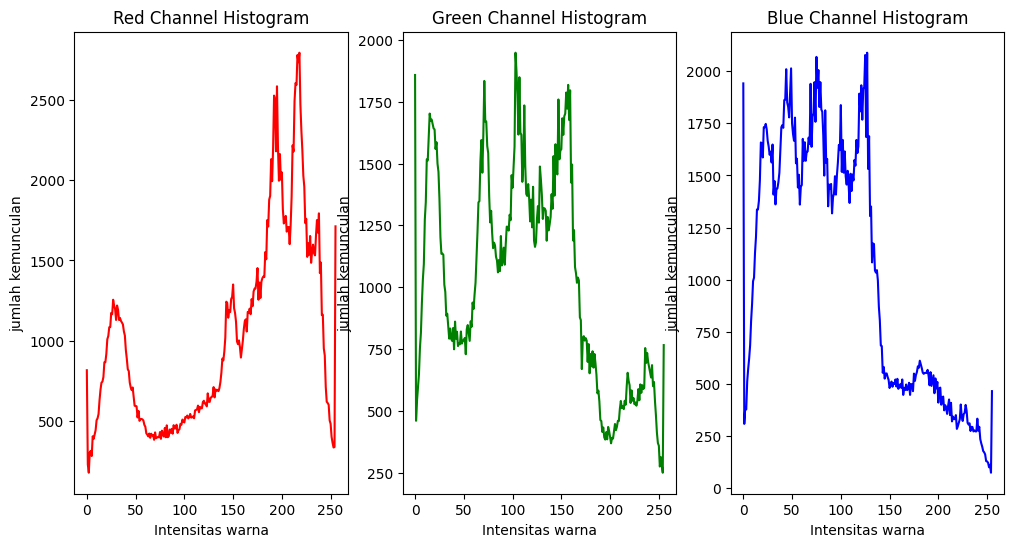

In [54]:
# Plot the histograms using matplotlib
plt.figure(figsize=(12, 6))

# plot histogram red chanel
plt.subplot(131)
plt.plot(hist_red, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

# plot histrogram green chanel
plt.subplot(132)
plt.plot(hist_green, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

# plot histogram blue chanel
plt.subplot(133)
plt.plot(hist_blue, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


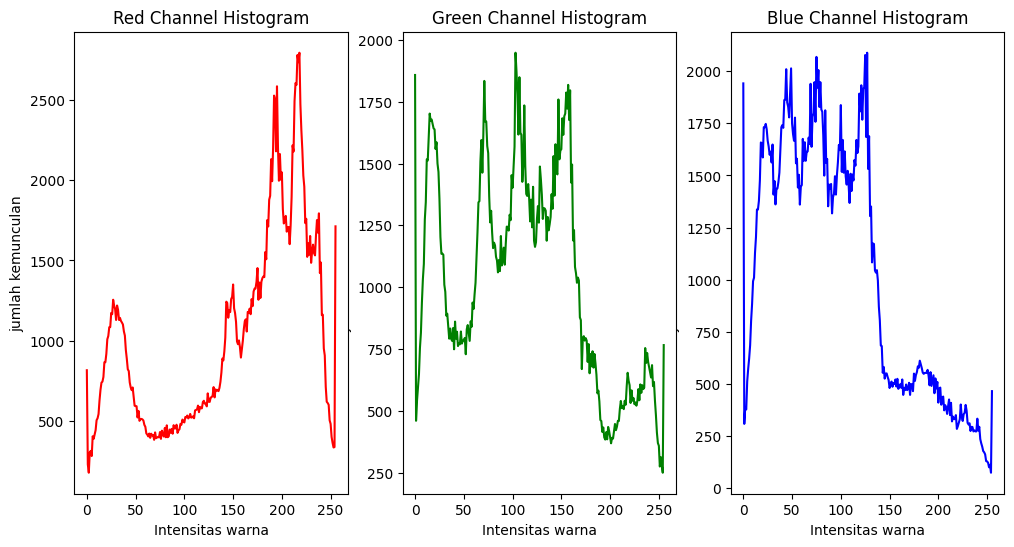

In [55]:
# Hitung histogram untuk setiap saluran menggunakan library NumPy
hist_b = np.histogram(b.ravel(), bins=256, range=(0, 256))
hist_g = np.histogram(g.ravel(), bins=256, range=(0, 256))
hist_r = np.histogram(r.ravel(), bins=256, range=(0, 256))

plt.figure(figsize=(12, 6))

plt.subplot(133)
plt.plot(hist_b[0], color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.subplot(132)
plt.plot(hist_g[0], color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.subplot(131)
plt.plot(hist_r[0], color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

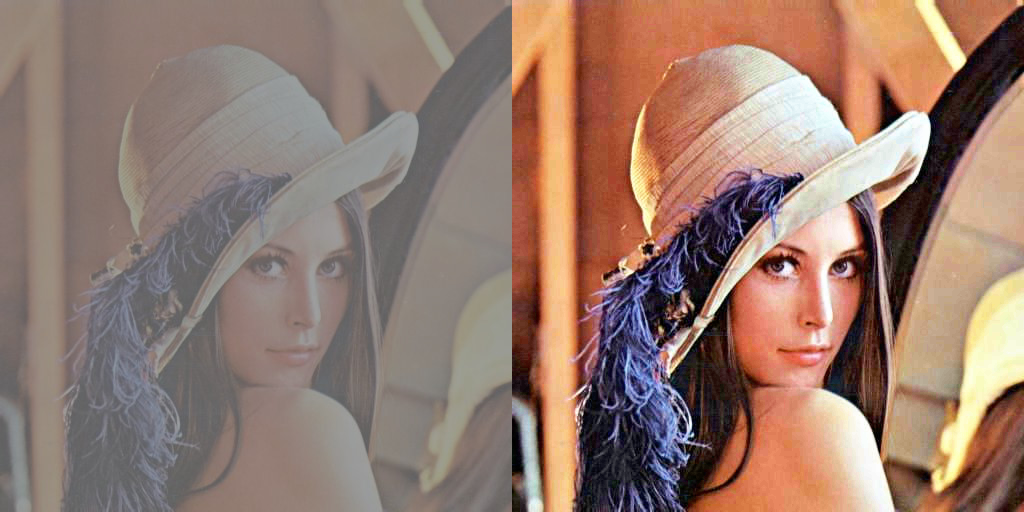

<BarContainer object of 256 artists>

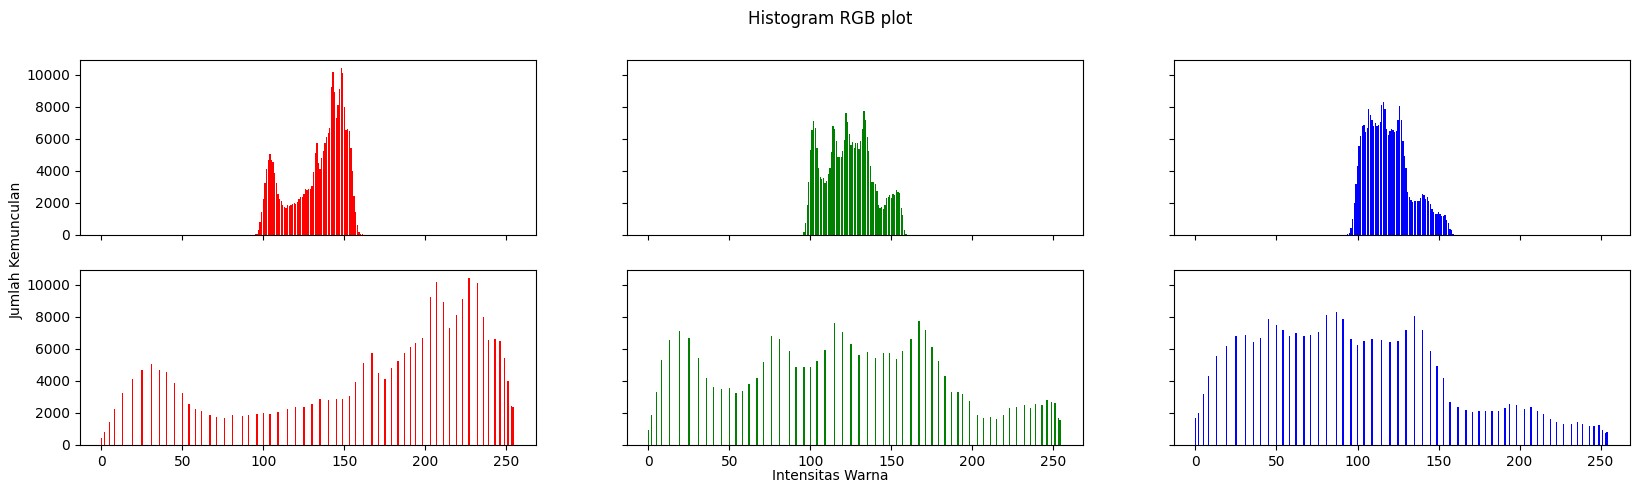

In [56]:
blue = [0]*256
green = [0]*256
red = [0]*256

img1 = cv2.imread('/content/drive/MyDrive/PCVK/image/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv2.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
#is_color_image = len(img1.shape) == 3 and img1.shape[2] == 3

fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

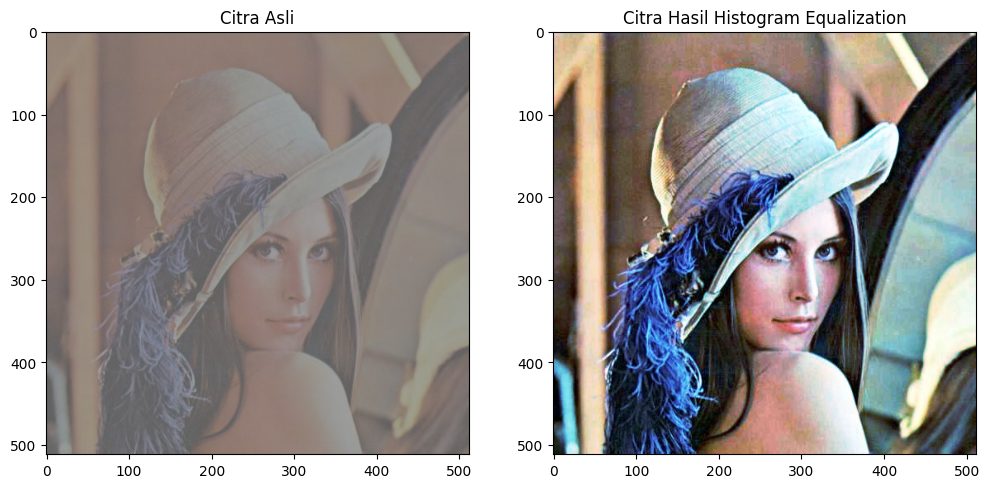

In [57]:
# Pisahkan saluran warna (B, G, R)
b, g, r = cv2.split(img1)

# Terapkan histogram equalization pada masing-masing saluran warna
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Gabungkan kembali saluran warna yang telah diubah
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# Tampilkan citra asli
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Tampilkan citra yang telah diekualisasi
plt.subplot(122)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Histogram Equalization')

plt.show()

hasil nya berbeda

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

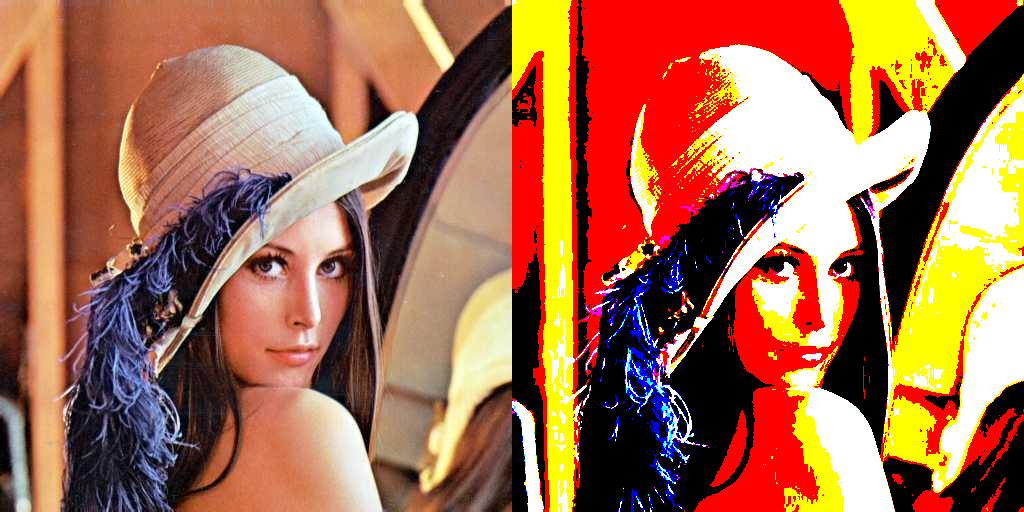

True

In [58]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv2.cvtColor(img_16, cv2.COLOR_BGR2RGB)
img_8 = cv2.cvtColor(img_8, cv2.COLOR_BGR2RGB)
final_frame = cv2.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv2.imwrite('/content/drive/MyDrive/PCVK/image/testlena.jpg', img_8)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

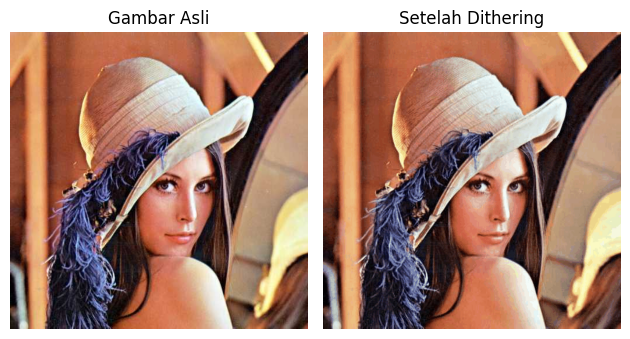

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar asli
image = Image.open('/content/drive/MyDrive/PCVK/image/lena.jpg')

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(image)
plt.axis('off')

# Terapkan dithering Floyd-Steinberg
image_dithered = image.convert('P', palette=Image.ADAPTIVE, dither=Image.FLOYDSTEINBERG)

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.title('Setelah Dithering')
plt.imshow(image_dithered)
plt.axis('off')

# Tampilkan plot
plt.tight_layout()
plt.show()

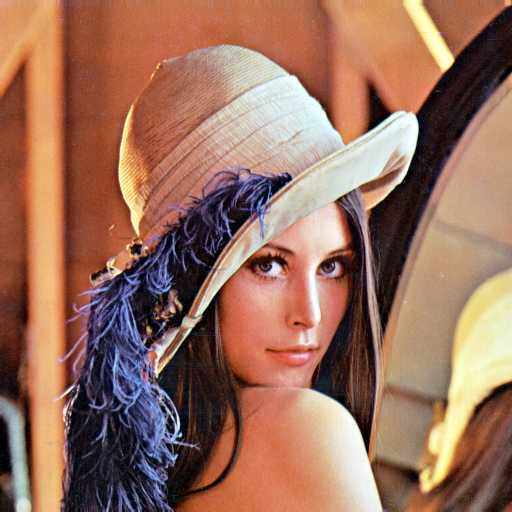

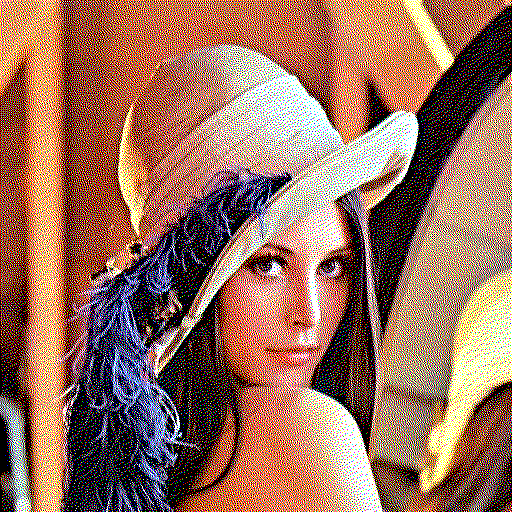

In [60]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/image/lena.jpg')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
cv2_imshow(img)
cv2_imshow(output_img)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

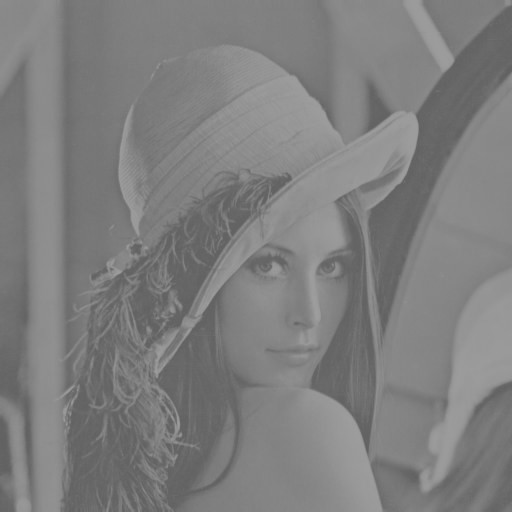

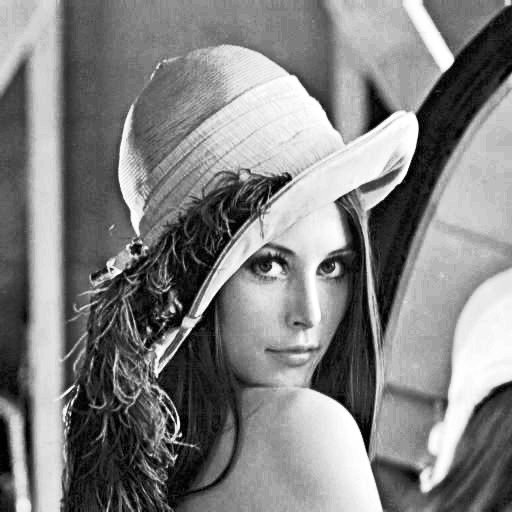

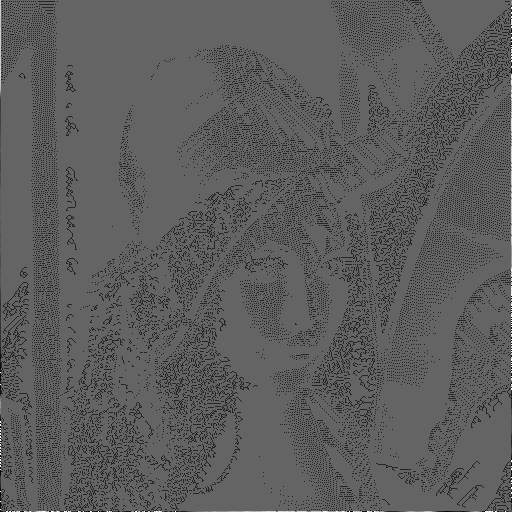

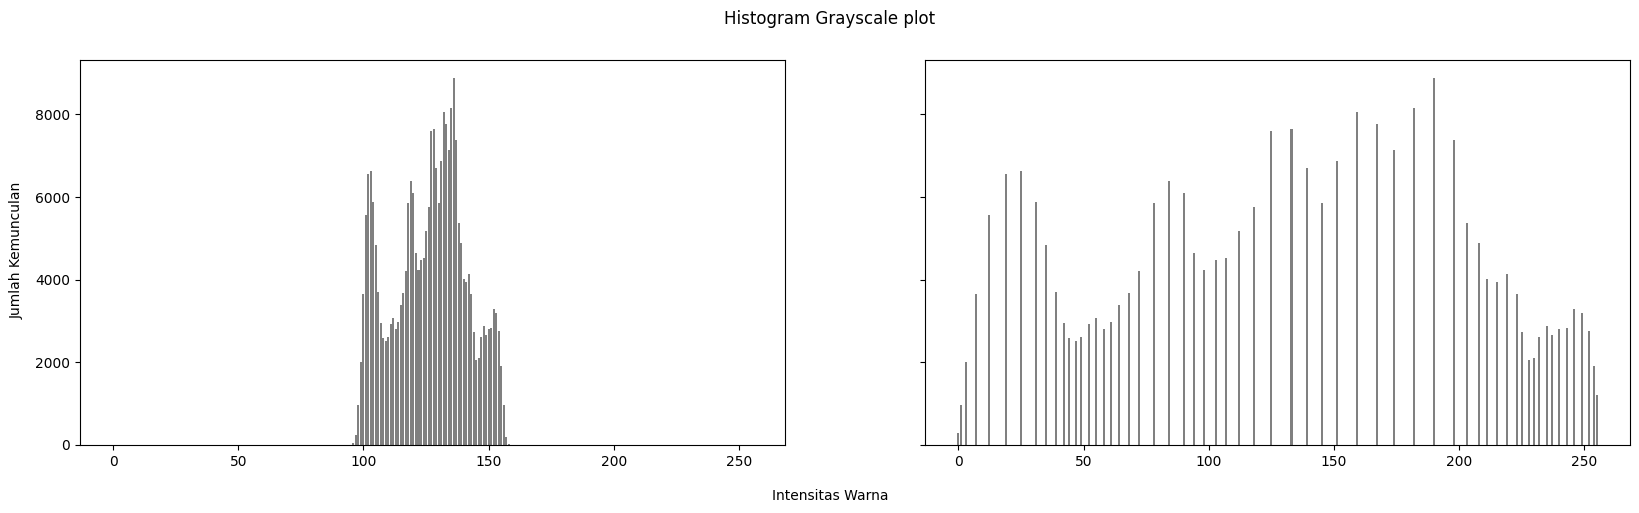

In [61]:
# Baca citra asli
image = cv2.imread("/content/drive/MyDrive/PCVK/image/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()